<h1>1.读取认证信息和租户信息</h1>
认证信息不需要在每次调用接口时都去通过登录重新获取，认证信息的有效时间是7天，因此在7天内都可以重复使用，可以直接读取user_info.json中保存的认证信息。

In [ ]:
import json

with open('user_info.json', 'r', encoding='utf-8') as f:
    payload = json.load(f)

token=payload["token"]
tenantId=payload["tenantId"]
print("认证信息：",token)
print("租户信息：",tenantId)

- 创建方案

In [ ]:

from dhicn_scenario_manager_service import *

start_time='2023-05-10T16:56:00'
end_time='2023-05-12T16:56:00'
group_id= "1082b4f3-a699-4bcd-a7c0-2525fef824dc"
new_scenario_name='python sdk测试新方案3'
parent_scenario_id= "171c59d2-d649-458e-9680-12001d9e49f0"
sub_type="WWTPMLab"
description='高氮负荷进水模拟方案'

# 初始化ApiClient

configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/global-scenario-manager-service" 

api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

param={
'StartTime': start_time,
'EndTime':end_time,
'GroupId':group_id,
'NewScenarioName':new_scenario_name,
'ParentScenarioId':parent_scenario_id,
'SubType':sub_type,
'Description':description
}

scenario_manager_instance=ScenarioManagerApi(api_client)
response=scenario_manager_instance.api_v2_scenario_manager_scenario_dfs_create_by_group_post("v2",create_scenario_by_group_para2=param)

print(response)

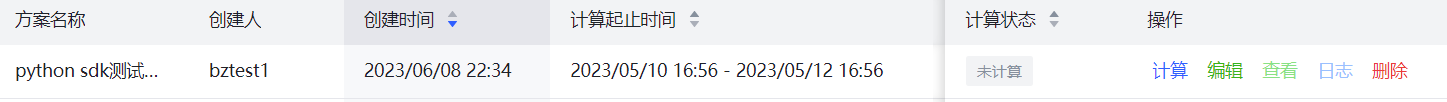

- 计算方案

In [ ]:

from dhicn_model_driver_service import *
import json
# 初始化ApiClient

configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/global-model-driver-service" 

api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

model_info={
    'scenarioId':"5e5255a0-a3c5-43f2-96fd-06a1190801ff",
    'tenantId':tenantId,
    'type':19
}
scenario_model_message_input={
'projectName': "bz",
'tenantId':tenantId,
'scenarioId':"5e5255a0-a3c5-43f2-96fd-06a1190801ff",
'modelType':"WWTP",
'priority':0,
'modelInfo':json.dumps(model_info)
}
model_run_instance=ModelRunApi(api_client)
response=model_run_instance.model_run_run_model_post(scenario_model_message_input=scenario_model_message_input)


print(response)

- 查询方案计算进度

In [ ]:

from dhicn_model_driver_service import *
import json
# 初始化ApiClient

configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/global-model-driver-service" 

api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

model_run_instance=ModelRunApi(api_client)

request_body=["5e5255a0-a3c5-43f2-96fd-06a1190801ff"]
response=model_run_instance.model_run_v2_calculate_status_post(request_body=request_body)

print(response)

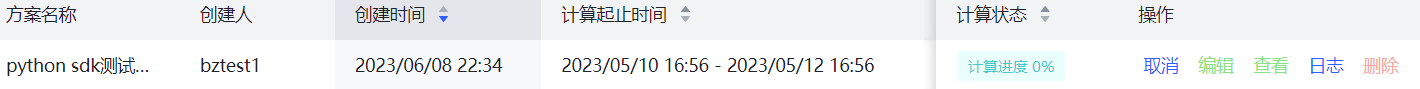
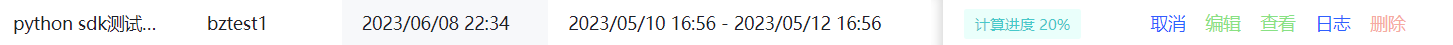
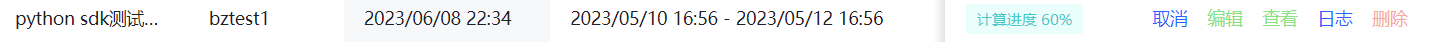

- 获取计算日志

In [ ]:

from dhicn_model_driver_service import *
import json
# 初始化ApiClient

configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/global-model-driver-service" 

api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

model_run_instance=ModelRunApi(api_client)

scenario_id="81ceff7d-322c-403f-a771-5031505609d4"
response=model_run_instance.model_run_v2_calculate_logs_get(scenario_id=scenario_id)

print(response)

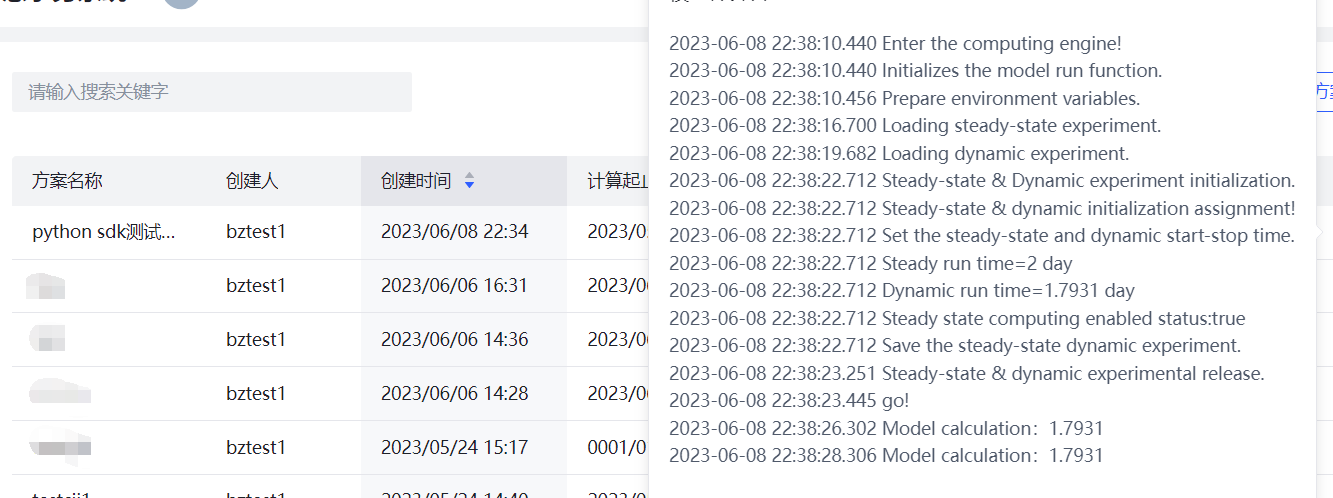

- 获取计算方案的出水水质结果

In [ ]:
from  dhicn_wwtp_data_bus_service import *

# 初始化ApiClient

configuration=Configuration.get_default_copy()
configuration.host="https://online-products.dhichina.cn/gateway/wwtp-paas-main-bus-service" 

api_client=ApiClient(configuration)
api_client.set_default_header('Authorization',token)
api_client.set_default_header('tenantId',tenantId)

process_simulation_instance=ProNumSimLabApi(api_client)

param={
'scenario_id':"ce9d9bd6-998c-4bf6-a5b0-c23700f48489",
'product_line':"1A",
'tank_no':1,
'model_name':"模拟实验室模型",
}
response=process_simulation_instance.api_v2_simulation_lab_result_indicator_statistic_get(**param)

print(response)

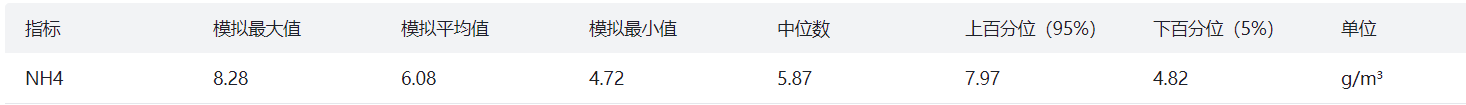